In [2]:
# -*- coding: utf-8 -*-
"""
HW1 Code Skeleton
@author: Jianhua Ruan
"""
import random # for generating random numbers
import matplotlib.pyplot as plt # for plotting
from functools import reduce # in case you need

# value will be updated to True automatically if you successfully implemented selection sort and merge sort
q1 = q2a = q2b = False

# Q1 Selection Sort 

Although not required, it should be in-place sorting (sort the original list)

## Complete the following cell (replace "pass" with your own code)

In [3]:
def selectionSort(numList):

    for i in range(len(numList)):

        min_index = i

        for j in range(i+1, len(numList)):

            if numList[min_index] > numList[j]:
                min_index = j

        numList[i], numList[min_index] = numList[min_index], numList[i]

    return numList


## Testing selection sort

In [4]:
a = [random.randint(0, 30) for _ in range(15)]
print('\n\n********* Q1 *********')
print('random array is: ', a)
    
b = selectionSort(a)
print('array content after selection sort: ', b)

if b == sorted(a):
    print('selectionSort is correct')     
    q1 = True;
else:
# use print instead of raising an error if your selection sort is incorrect 
# but you want to continue with the rest of the code
    print('selectionSort is incorrect')     
    
#    raise SystemExit('selectionSort is incorrect')



********* Q1 *********
random array is:  [9, 11, 25, 11, 15, 27, 5, 2, 18, 15, 14, 25, 22, 23, 0]
array content after selection sort:  [0, 2, 5, 9, 11, 11, 14, 15, 15, 18, 22, 23, 25, 25, 27]
selectionSort is correct


# Q2a. Merge function

## Complete the following cell (replace "pass" with your own code)

In [5]:

def merge(sortedListA, sortedListB):
    """Given two non-decreasingly sorted list of numbers, 
       return a single merged list in non-decreasing order
       e.g., if sortedlistA is [1, 3, 8] and sortedListB 
       is [2, 4, 6, 7], the merge function should return [1, 2, 3, 4, 6, 7, 8]
    """

    combined_list = []

    i, j = 0, 0
    while i < len(sortedListA) and j < len(sortedListB):
        if sortedListA[i] < sortedListB[j]:
            combined_list.append(sortedListA[i])
            i+=1
        else: 
            combined_list.append(sortedListB[j])
            j +=1
    
    combined_list = combined_list + sortedListA[i:] + sortedListB[j:]

    return combined_list

## Testing merge function

In [6]:

a = sorted([random.randint(0, 20) for _ in range(6)]) # a is sorted 
b = sorted([random.randint(0, 20) for _ in range(5)]) # b is sorted

print('\n\n********* Q2a *********')
print('a is: ', a)
print('b is: ', b)

c = merge(a, b) # c should be sorted(a+b)
print('merged result: ', c)

if (c == sorted(a + b)):
    print('merge is correct')
    q2a = True
else:
# use print instead of raising an error if your merge function is incorrect 
# but you want to continue with the rest of the code
    print('merge is incorrect')
#    raise SystemExit('merge is incorrect')    




********* Q2a *********
a is:  [8, 9, 10, 13, 15, 18]
b is:  [1, 5, 8, 13, 20]
merged result:  [1, 5, 8, 8, 9, 10, 13, 13, 15, 18, 20]
merge is correct


# Q2b merge sort 

Not an in-place sorting (returns a new sorted list)

## Complete the following cell (replace "pass" with your own code)

In [7]:
def mergeSort(numList):
    """
    Given a list of numbers in random order, 
    return a new list sorted in non-decreasing order, 
    and leave the original list unchanged.
    """
    if len(numList) > 1:

        middle = len(numList) // 2
        left = numList[:middle]
        right = numList[middle:]
        mergeSort(left)
        mergeSort(right)
        i, j, k = 0, 0, 0

        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                numList[k] = left [i]
                i += 1
            else:
                numList[k] = right[j]
                j += 1
            k += 1
        
        while i < len(left):
            numList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            numList[k] = right[j]
            j += 1
            k += 1

    return numList    

## Testing mergeSort function

In [8]:

    
a = [random.randint(0, 30) for _ in range(15)]
    

print('\n\n********* Q2b *********')
print('random array is: ', a)


b = mergeSort(a)
print('merge sorted array is: ', b)


if b == sorted(a):
    print('mergeSort is correct') 
    q2b = True

else:
# use print instead of raising an error if your merge sort is incorrect 
# but you want to continue with the rest of the code
    print('mergeSort is incorrect')
#    raise SystemExit('mergeSort is incorrect')




********* Q2b *********
random array is:  [15, 5, 30, 4, 20, 1, 25, 24, 17, 8, 17, 21, 20, 2, 30]
merge sorted array is:  [1, 2, 4, 5, 8, 15, 17, 17, 20, 20, 21, 24, 25, 30, 30]
mergeSort is correct


# Q3 Experiment and plot the running time vs input size

Run the three sorting algorithms on different input sizes and collect running time; if you have not finished q1 and q2, some fake data will be provided for you to complete the plotting

In [9]:
import time

# input size is 10 * (1, 2, 4, 8, ..., 512, 1024, 2048)
k = 12
sizes = [10 * 2**i for i in range(k)]

quick_sort_time = [0] * k
selection_sort_time = [0] * k
merge_sort_time = [0] * k

print('\n********* Q3 *********')
print('Collecting running time (in milliseconds)')

for i in range(k):
    print('iteration %d, size = %d' %(i, sizes[i]))
    # random array of size sizes[i]
    a = [random.random() for _ in range(sizes[i])]
    start_time = time.perf_counter()
    sorted(a)
    quick_sort_time[i] = 1000*(time.perf_counter() - start_time) 
    # collect selection sort time if q1 is done
    if q1: 
        start_time = time.perf_counter()
        selectionSort(a)
        selection_sort_time[i] = 1000*(time.perf_counter() - start_time)  
    # collect merge sort time if q2 is done
    if q2a and q2b:
        start_time = time.perf_counter()
        mergeSort(a)
        merge_sort_time[i] = 1000*(time.perf_counter() - start_time) 

   


********* Q3 *********
iteration 0, size = 10
iteration 1, size = 20
iteration 2, size = 40
iteration 3, size = 80
iteration 4, size = 160
iteration 5, size = 320
iteration 6, size = 640
iteration 7, size = 1280
iteration 8, size = 2560
iteration 9, size = 5120
iteration 10, size = 10240
iteration 11, size = 20480


In [10]:
quick_sort_time

[0.0019999999949504854,
 0.001200000014023317,
 0.0022000000114985596,
 0.005899999990788274,
 0.010500000001911758,
 0.022800000010647636,
 0.04710000001750814,
 0.10009999999738284,
 0.25410000000647415,
 0.5012999999962631,
 1.1231999999949949,
 2.2846999999899253]

In [11]:
if not q1: # fake some values for plotting        
    selection_sort_time = [quick_sort_time[0] * 3 * 2**(2*i) * (9.5+random.random()) / 10 for i in range(k)]; 
    print('\nSelection sort time is fake\n')

selection_sort_time

[0.006499999983589078,
 0.012099999992187804,
 0.04110000000423497,
 0.12039999998592066,
 0.43499999998175554,
 1.8078000000230077,
 7.326699999993025,
 32.936299999988705,
 125.85670000001414,
 519.2504000000042,
 2080.5362000000114,
 8694.624599999997]

In [12]:
if not q2a or not q2b: # fake some values for plotting        
    merge_sort_time = [quick_sort_time[0] * 3 * 2**(i) * (i+3) * (9.5+random.random()) / 10 for i in range(k)]; 
    print('\nMerge sort time is fake\n')
merge_sort_time

[0.013800000004948743,
 0.023300000009385258,
 0.05129999999553547,
 0.1119000000073811,
 0.267100000002074,
 0.4858000000069751,
 0.9583000000077391,
 2.2653000000047996,
 4.38429999999812,
 9.878700000001572,
 21.233300000005784,
 52.479699999992135]

## Complete the following code to plot the running time; use the style show in the homework document as template, reproduce as much detail as possible.



### Q3a. plot running time vs input size (Fig 1)

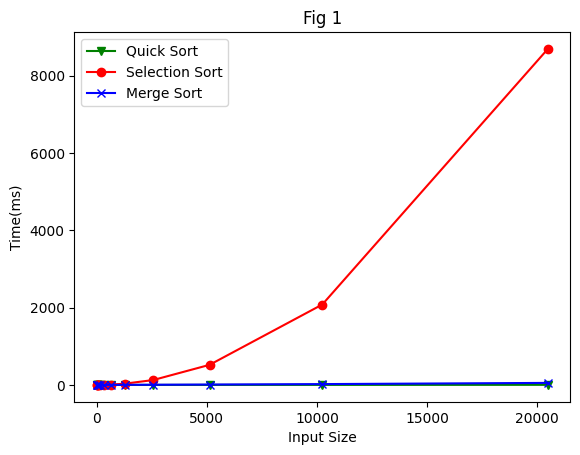

In [13]:
plt.figure()
plt.title('Fig 1')

##########################
plt.plot(sizes,quick_sort_time, color = 'green', marker = 'v', linestyle = 'solid')
plt.plot(sizes,selection_sort_time, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(sizes,merge_sort_time, color = 'blue', marker = 'x', linestyle = 'solid') 
plt.ylabel("Time(ms)")
plt.xlabel("Input Size")
plt.legend(['Quick Sort', 'Selection Sort', 'Merge Sort'])
##########################
plt.show()


### Q3b. plot running time in log scale vs input size (Fig 2)

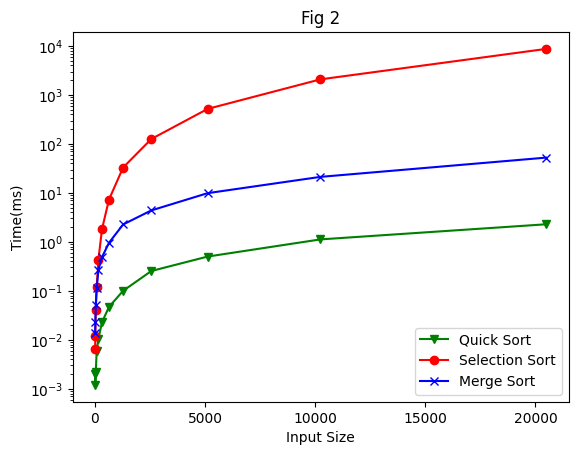

In [14]:
plt.figure()
plt.title('Fig 2')
##########################
plt.plot(sizes,quick_sort_time, color = 'green', marker = 'v', linestyle = 'solid')
plt.plot(sizes,selection_sort_time, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(sizes,merge_sort_time, color = 'blue', marker = 'x', linestyle = 'solid') 
plt.ylabel("Time(ms)")
plt.xlabel("Input Size")
plt.legend(['Quick Sort', 'Selection Sort', 'Merge Sort'])
plt.yscale("log")
##########################
plt.show()

### Q3c. plot running time vs input size in loglog scale (Fig 3)


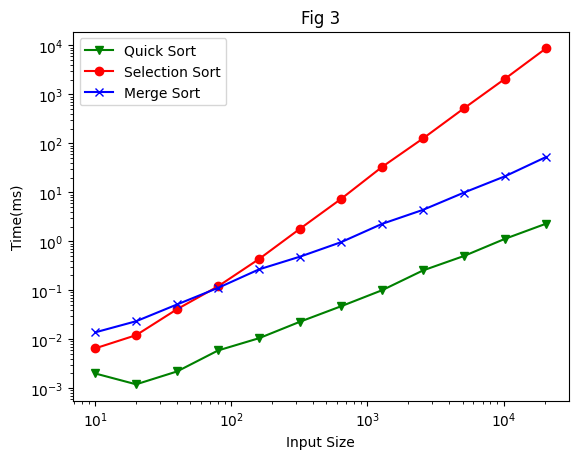

In [15]:
plt.figure()
plt.title('Fig 3')

##########################
plt.plot(sizes,quick_sort_time, color = 'green', marker = 'v', linestyle = 'solid')
plt.plot(sizes,selection_sort_time, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(sizes,merge_sort_time, color = 'blue', marker = 'x', linestyle = 'solid') 
plt.ylabel("Time(ms)")
plt.xlabel("Input Size")
plt.legend(['Quick Sort', 'Selection Sort', 'Merge Sort'])
plt.yscale("log")
plt.xscale("log")
##########################

plt.show()

### Q3d. plot running time per input element, in loglog scale (Fig 4)

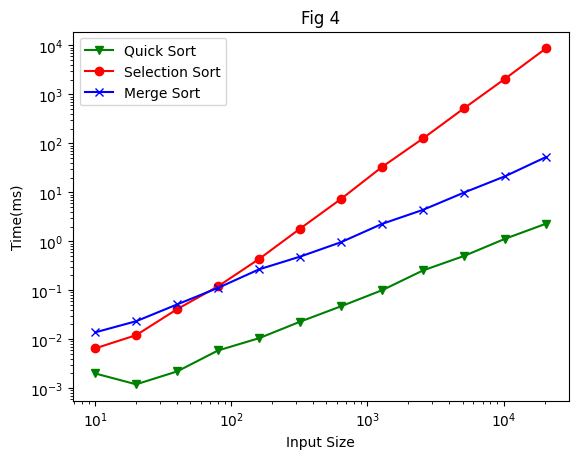

In [16]:
plt.figure()
plt.title('Fig 4')

##########################

plt.plot(sizes,quick_sort_time, color = 'green', marker = 'v', linestyle = 'solid')
plt.plot(sizes,selection_sort_time, color = 'red', marker = 'o', linestyle = 'solid')
plt.plot(sizes,merge_sort_time, color = 'blue', marker = 'x', linestyle = 'solid') 
plt.ylabel("Time(ms)")
plt.xlabel("Input Size")
plt.legend(['Quick Sort', 'Selection Sort', 'Merge Sort'])
plt.yscale("log")
plt.xscale("log")  

##########################
plt.show()

# Q4: More experiments and plotting

The following code repeats the running time measurement on each input size 10 times, 
and collect the data in a longer list. There are a total of 9 input sizes: 10, 20, 40, 80, 160, ..., 2560.
The code below runs each sorting algorithm 10 times on each input size, and collect the running time in a list of 90 elements: the first 10 elements are for input size 10, the second for input size 20, the third for 40, etc.
The running time for quick sort is stored in quick_sort_time_with_repeats, and the running time for merge sort is in merge_sort_time_with_repeats.


In [17]:
k = 9
repeats = 10
sizes = [10 * 2**i for i in range(k)]

quick_sort_time_with_repeats = [0] * (repeats * k)
merge_sort_time_with_repeats = quick_sort_time_with_repeats[:]

print('\n\n********* Q3 *********')
print('Collecting running time (in milliseconds)')

for i in range(k):
    print('iteration %d, size = %d' %(i, sizes[i]))
    for j in range(repeats):
        # random array of size sizes[i]
        a = [random.random() for _ in range(sizes[i])]
        start_time = time.perf_counter()
        sorted(a);
        quick_sort_time_with_repeats[i*repeats + j] = 1000*(time.perf_counter() - start_time);
        # collect merge sort time if q2 is done
        if q2a and q2b:
            start_time = time.perf_counter()
            mergeSort(a);
            merge_sort_time_with_repeats[i*repeats + j] = 1000*(time.perf_counter() - start_time); 
        else:
            merge_sort_time_with_repeats[i*repeats + j] = quick_sort_time[0] * 3 * 2**(i) * (i+3) * (9.5+random.random())/10;




********* Q3 *********
iteration 0, size = 10
iteration 1, size = 20
iteration 2, size = 40
iteration 3, size = 80
iteration 4, size = 160
iteration 5, size = 320
iteration 6, size = 640
iteration 7, size = 1280
iteration 8, size = 2560


In [18]:
# uncomment to see the values; comment out before submission.
# quick_sort_time_with_repeats

In [19]:
# uncomment to see the values; comment out before submission.
# merge_sort_time_with_repeats

### Q4a Complete the following blocks 
Write your own code to compute the average running time for each input size (you should end up with 9 values for each algorithm - one for each input size). You can either define your own mean function, or do that without defining a function.

In [20]:
# compute and display the avg running time for quick sort for each input size

##########################
i = 0
j = 1
store = 0
quick_answers = []
for i in range(len(quick_sort_time_with_repeats)):

    store += quick_sort_time_with_repeats[i]
    if(j == 10):
        quick_answers.append(store/10)
        j = 1
        store = 0

    j += 1
    i += 1

print(quick_answers)
##########################


[0.0006999999982326699, 0.0008300000047256617, 0.0016100000010510485, 0.0036499999993111487, 0.007129999997346204, 0.013800000002106572, 0.029250000002889465, 0.057049999998071144, 0.11156000000198674]


In [21]:
# compute and display the avg running time for quick sort for each input size

##########################
i = 0
j = 1
store = 0
merge_answers = []
for i in range(len(merge_sort_time_with_repeats)):

    store += merge_sort_time_with_repeats[i]
    if(j == 10):
        merge_answers.append(store/10)
        j = 1
        store = 0

    j += 1
    i += 1

print(merge_answers)   
##########################


[0.009540000004903959, 0.018439999993802303, 0.0402800000017578, 0.0818500000008271, 0.17630000000110613, 0.3407699999996794, 0.7307699999984152, 1.4887600000037082, 2.888090000004695]


### Q4b Plot the average running time as a function of input size in loglog scale 


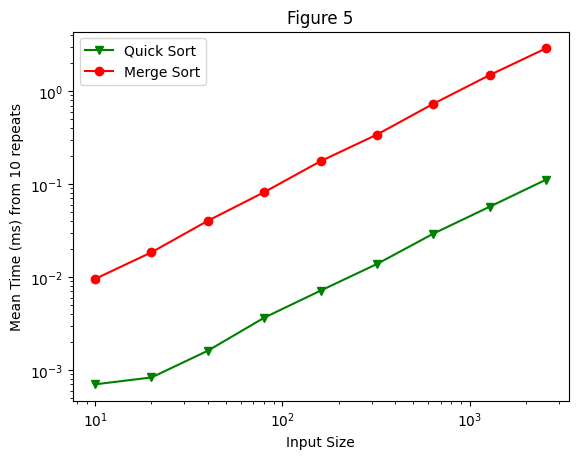

In [26]:
plt.figure()

##########################
plt.plot(sizes,quick_answers, color = 'green', marker = 'v', linestyle = 'solid')
plt.plot(sizes,merge_answers, color = 'red', marker = 'o', linestyle = 'solid') 
plt.ylabel("Mean Time (ms) from 10 repeats")
plt.xlabel("Input Size")
plt.legend(['Quick Sort', 'Merge Sort']) 
plt.yscale("log")
plt.xscale("log")   
##########################


plt.title('Figure 5')
plt.show()

### Q4c Based on Figure 5, what is the approximate running time needed for quick sort to sort 100 values and 1000 values, respecitvely? You answer here: 

In [23]:
#100 values = .0031 miliseconds
#1000 values = .056 miliseconds

### Q4d Based on Figure 5, what is the approximate running time needed for merge sort to sort 100 and 1000 values, respectively? You answer here: 

#100 values = .316 miliseconds
#1000 values = 3.16 miliseconds

### Q4e Based on Figure 5, if the trend continues, what would the approximate running time needed to sort 10,000 values, using quick sort and merge sort, respectively? You answer here: 

#Yes if the trend continues the run time would be around .56 miliseconds for quick sort and 31.6 miliseconds